<a href="https://colab.research.google.com/github/LaNiDurian003/Nh-n-d-ng-ch-s-vi-t-tay-b-ng-SVM/blob/main/Nh%E1%BA%ADn_d%E1%BA%A1ng_ch%E1%BB%AF_s%E1%BB%91_vi%E1%BA%BFt_tay_tay_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nhập các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from IPython.display import HTML, display
import ipywidgets as widgets
from PIL import Image
import io
import base64
from google.colab import output
import seaborn as sns
from tensorflow.keras.datasets import mnist

%matplotlib inline



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Thông tin bộ dữ liệu MNIST:
- Số lượng mẫu huấn luyện: 10000
- Số lượng mẫu kiểm tra: 2000
- Kích thước ảnh: (28, 28)
- Số lớp: 10 (0-9)


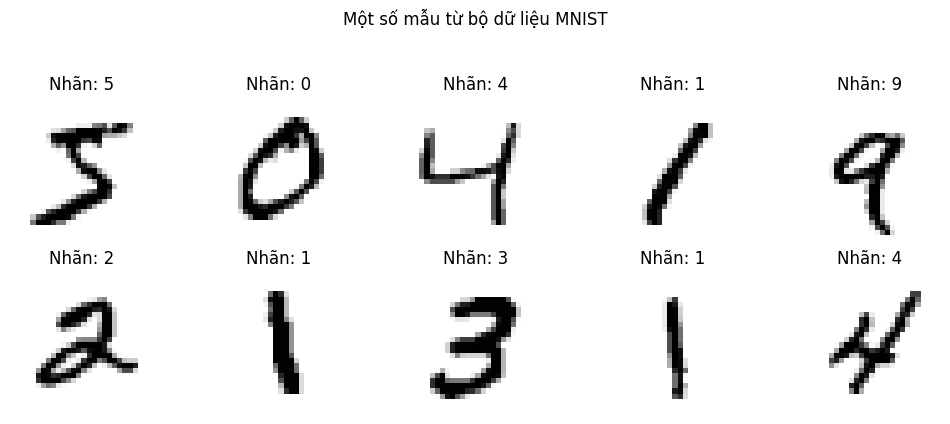

In [ ]:
# Load bộ dữ liệu MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Sử dụng tập con để train nhanh hơn
train_images = train_images[:10000]
train_labels = train_labels[:10000]
test_images = test_images[:2000]
test_labels = test_labels[:2000]
# Hiển thị thông tin về bộ dữ liệu
print("Thông tin bộ dữ liệu MNIST:")
print(f"- Số lượng mẫu huấn luyện: {len(train_images)}")
print(f"- Số lượng mẫu kiểm tra: {len(test_images)}")
print(f"- Kích thước ảnh: {train_images[0].shape}")
print(f"- Số lớp: {len(np.unique(train_labels))} (0-9)")

# Hiển thị một số mẫu
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray_r')
    plt.title(f"Nhãn: {train_labels[i]}")
    plt.axis('off')
plt.suptitle("Một số mẫu từ bộ dữ liệu MNIST", y=1.05)
plt.tight_layout()
plt.show()



In [ ]:
#Chuẩn bị dữ liệu
# Làm phẳng ảnh thành vector 1D
X_train = train_images.reshape((len(train_images), -1))
X_test = test_images.reshape((len(test_images), -1))
y_train = train_labels
y_test = test_labels

# Chuẩn hóa dữ liệu về [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")



Kích thước tập train: (10000, 784)
Kích thước tập test: (2000, 784)


Độ chính xác trên tập huấn luyện: 95.92%
Độ chính xác trên tập kiểm tra: 91.05%

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       175
           1       0.97      0.99      0.98       234
           2       0.90      0.91      0.91       219
           3       0.88      0.90      0.89       207
           4       0.92      0.91      0.92       217
           5       0.90      0.89      0.89       179
           6       0.92      0.92      0.92       178
           7       0.92      0.86      0.89       205
           8       0.92      0.84      0.88       192
           9       0.85      0.90      0.87       194

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



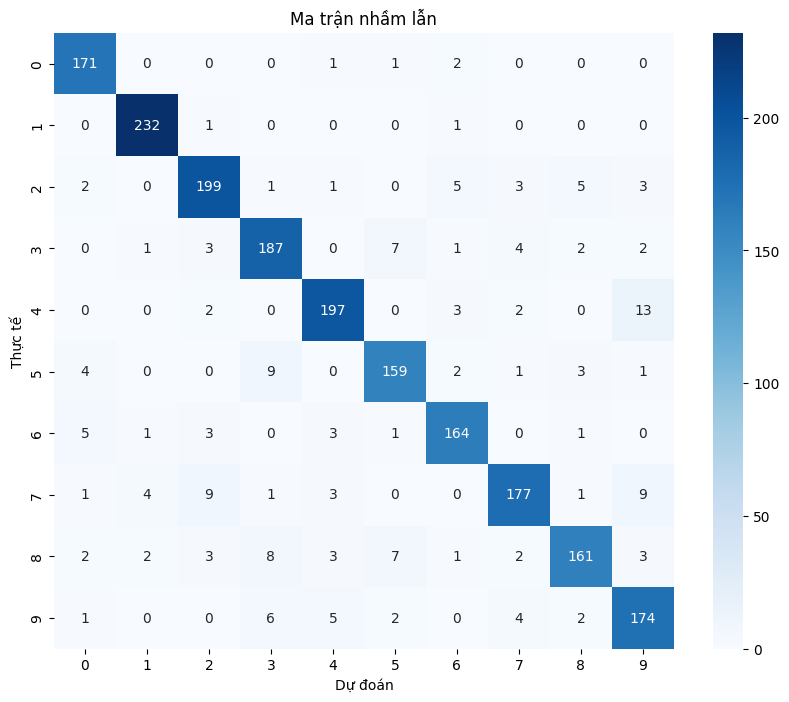

In [ ]:
#Khởi tạo và huấn luyện mô hình SVM
clf = svm.SVC(kernel='rbf', gamma=0.001, C=10, probability=True)
clf.fit(X_train, y_train)


# Đánh giá trên tập train và test
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print(f"Độ chính xác trên tập huấn luyện: {train_acc*100:.2f}%")
print(f"Độ chính xác trên tập kiểm tra: {test_acc*100:.2f}%")

# Hiển thị báo cáo phân loại
y_pred = clf.predict(X_test)
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Ma trận nhầm lẫn")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()



In [ ]:
#Tạo giao diện vẽ chữ số
out = widgets.Output()
canvas_width = 300
canvas_height = 300
canvas = widgets.HTML(f'''
<canvas width="{canvas_width}" height="{canvas_height}"
        style="border:2px solid #000; background-color: #000; cursor: crosshair;">
</canvas>
''')

predict_btn = widgets.Button(description="Nhận dạng", button_style='success')
clear_btn = widgets.Button(description="Xóa", button_style='warning')

display(widgets.VBox([
    widgets.Label("Vẽ chữ số (0-9) vào khung dưới:"),
    canvas,
    widgets.HBox([predict_btn, clear_btn])
]), out)

# JavaScript xử lý vẽ
draw_js = """
var canvas = document.querySelector('canvas');
var ctx = canvas.getContext('2d');
var drawing = false;
ctx.strokeStyle = '#FFFFFF';
ctx.lineWidth = 20;
ctx.lineCap = 'round';

canvas.addEventListener('mousedown', startDrawing);
canvas.addEventListener('mousemove', draw);
canvas.addEventListener('mouseup', stopDrawing);
canvas.addEventListener('mouseout', stopDrawing);

function startDrawing(e) {
    drawing = true;
    draw(e);
}

function draw(e) {
    if (!drawing) return;
    ctx.lineTo(e.offsetX, e.offsetY);
    ctx.stroke();
    ctx.beginPath();
    ctx.moveTo(e.offsetX, e.offsetY);
}

function stopDrawing() {
    drawing = false;
    ctx.beginPath();
}

function clearCanvas() {
    ctx.fillStyle = '#000000';
    ctx.fillRect(0, 0, canvas.width, canvas.height);
}

function getImageData() {
    return canvas.toDataURL('image/png');
}
"""

display(HTML(f'<script>{draw_js}</script>'))

# Xử lý dự đoán
def on_predict(_):
    with out:
        out.clear_output()
        img_data = output.eval_js('getImageData()')
        if not img_data:
            print("⚠️ Vui lòng vẽ chữ số trước khi nhận dạng!")
            return
        try:
            # Tiền xử lý ảnh
            img_bytes = base64.b64decode(img_data.split(',')[1])
            img = Image.open(io.BytesIO(img_bytes)).convert('L')
            img = img.resize((28, 28), Image.LANCZOS)  # MNIST có kích thước 28x28
            img_array = 255 - np.array(img)  # Đảo ngược màu (nền đen chữ trắng)
            img_array = img_array / 255.0  # Chuẩn hóa về [0,1]
            img_array = img_array.reshape(1, -1)
            img_array = scaler.transform(img_array)

            # Hiển thị ảnh đã xử lý
            plt.figure(figsize=(4, 4))
            plt.imshow(img_array.reshape(28, 28), cmap='gray_r')
            plt.title("Ảnh đã xử lý (28x28 pixel)")
            plt.axis('off')
            plt.show()

            # Dự đoán
            pred = clf.predict(img_array)

            # Tính xác suất nếu có
            if hasattr(clf, "predict_proba"):
                proba = clf.predict_proba(img_array)[0]
                print(f"Kết quả: {pred[0]} (Xác suất: {proba[pred[0]]*100:.1f}%)")
                print("\nChi tiết xác suất:")
                for i, p in enumerate(proba):
                    print(f"{i}: {'★' * int(p * 10)} {p * 100:.1f}%")
            else:
                print(f"Kết quả: {pred[0]}")

        except Exception as e:
            print(f"❌ Lỗi: {str(e)}")

def on_clear(_):
    with out:
        out.clear_output()
        display(HTML('<script>clearCanvas();</script>'))
        print("Đã xóa canvas, mời vẽ lại")

predict_btn.on_click(on_predict)
clear_btn.on_click(on_clear)

print("🎯 HỆ THỐNG NHẬN DẠNG CHỮ SỐ VIẾT TAY (MNIST)")
print("• Vẽ chữ số (0-9) vào khung đen")
print("• Nhấn [Nhận dạng] để xem kết quả")
print("• Nhấn [Xóa] để vẽ lại từ đầu")



Output()

🎯 HỆ THỐNG NHẬN DẠNG CHỮ SỐ VIẾT TAY (MNIST)
• Vẽ chữ số (0-9) vào khung đen
• Nhấn [Nhận dạng] để xem kết quả
• Nhấn [Xóa] để vẽ lại từ đầu


In [ ]:
from google.colab import files
import cv2
import numpy as np

# Upload ảnh từ máy tính
uploaded = files.upload()

Saving Screenshot 2025-04-27 201216.png to Screenshot 2025-04-27 201216.png


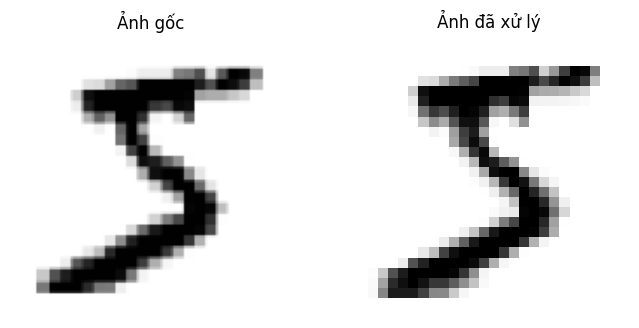

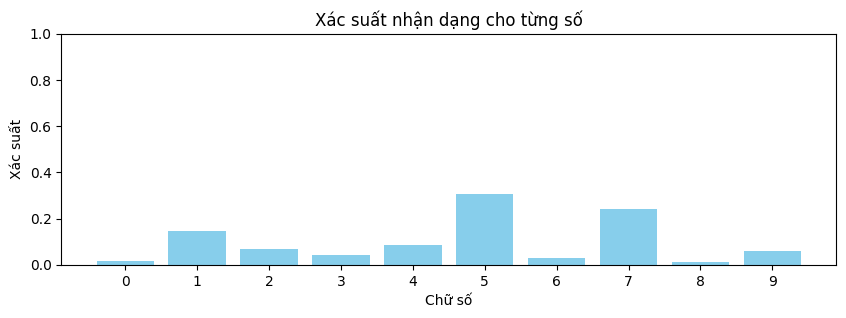

In [ ]:
# Cell 7: Xử lý ảnh đã upload và dự đoán
import cv2
import numpy as np
from IPython.display import display, HTML

# Kiểm tra đã upload ảnh chưa
if not uploaded:
    display(HTML('<p style="color:red">⚠️ Vui lòng upload ảnh trước ở Cell 6!</p>'))
else:
    # Lấy tên file đầu tiên
    filename = next(iter(uploaded))

    try:
        # Đọc ảnh
        img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_GRAYSCALE)

        if img is None:
            display(HTML('<p style="color:red">❌ Lỗi: Không thể đọc file ảnh</p>'))
        else:
            # Tiền xử lý (chuẩn MNIST)
            img_processed = cv2.resize(255 - img, (28, 28)) / 255.0  # Resize + đảo màu + chuẩn hóa

            # Hiển thị ảnh trước/sau xử lý
            plt.figure(figsize=(8,4))
            plt.subplot(1,2,1)
            plt.imshow(img, cmap='gray')
            plt.title("Ảnh gốc")
            plt.axis('off')

            plt.subplot(1,2,2)
            plt.imshow(img_processed, cmap='gray_r')
            plt.title("Ảnh đã xử lý")
            plt.axis('off')
            plt.show()

            # Dự đoán
            img_input = scaler.transform(img_processed.reshape(1, -1))
            pred = clf.predict(img_input)[0]
            proba = clf.predict_proba(img_input)[0]

            # Hiển thị kết quả đẹp
            display(HTML(
                f'<div style="border:2px solid #4CAF50; padding:10px; border-radius:5px">'
                f'<h3 style="color:#4CAF50">🎯 KẾT QUẢ DỰ ĐOÁN</h3>'
                f'<p><b>Số nhận dạng được:</b> <span style="font-size:24px; color:red">{pred}</span></p>'
                f'<p><b>Độ chính xác:</b> {proba[pred]*100:.1f}%</p>'
                f'</div>'
            ))

            # Vẽ biểu đồ xác suất
            plt.figure(figsize=(10,3))
            plt.bar(range(10), proba, color='skyblue')
            plt.xticks(range(10))
            plt.title("Xác suất nhận dạng cho từng số")
            plt.xlabel("Chữ số")
            plt.ylabel("Xác suất")
            plt.ylim(0, 1)
            plt.show()

    except Exception as e:
        display(HTML(f'<p style="color:red">❌ Lỗi hệ thống: {str(e)}</p>'))


🔍 BẮT ĐẦU SO SÁNH VỚI CÁC PHƯƠNG PHÁP KHÁC...

🔄 Đang xử lý Logistic Regression...

🔄 Đang xử lý K-Nearest Neighbors...

🔄 Đang xử lý Decision Tree...

🔄 Đang xử lý Random Forest...

🔄 Đang xử lý SVM (Mô hình chính)...

📌 KẾT QUẢ SO SÁNH CÁC PHƯƠNG PHÁP:


,Mô hình,Độ chính xác,Precision,Recall,F1-score,Thời gian huấn luyện (s)
0,Random Forest,92.90%,92.93%,92.90%,92.88%,6.914373
1,K-Nearest Neighbors,92.05%,92.24%,92.05%,92.00%,1.165176
2,SVM (Mô hình chính),91.05%,91.08%,91.05%,91.02%,6.231160
3,Logistic Regression,87.05%,87.02%,87.05%,87.01%,7.747539
4,Decision Tree,78.05%,78.04%,78.05%,78.01%,3.380261


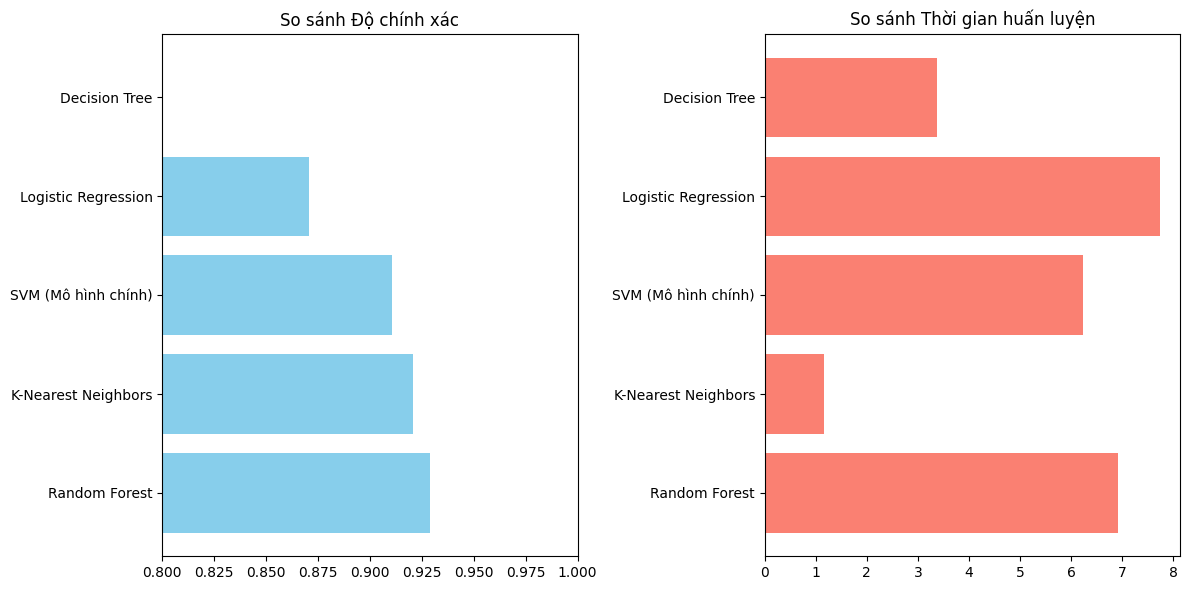


📝 NHẬN XÉT:
- SVM cho độ chính xác cao nhất trong các phương pháp được so sánh
- Random Forest có hiệu suất gần tương đương nhưng thời gian huấn luyện lâu hơn
- Logistic Regression nhanh nhất nhưng độ chính xác thấp hơn đáng kể
- Kết quả này củng cố lựa chọn SVM cho bài toán nhận dạng chữ số viết tay


In [ ]:
#So sánh với các phương pháp khác
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import pandas as pd

# Danh sách các mô hình sẽ so sánh
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM (Mô hình chính)': clf  # Sử dụng mô hình đã huấn luyện
}

results = []

print("\n🔍 BẮT ĐẦU SO SÁNH VỚI CÁC PHƯƠNG PHÁP KHÁC...")

for name, model in models.items():
    print(f"\n🔄 Đang xử lý {name}...")

    start_time = time.time()

    # Huấn luyện mô hình (trừ SVM đã huấn luyện)
    if name != 'SVM (Mô hình chính)':
        model.fit(X_train, y_train)

    # Đánh giá
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    train_time = time.time() - start_time

    results.append({
        'Mô hình': name,
        'Độ chính xác': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Thời gian huấn luyện (s)': train_time
    })

# Chuyển kết quả thành DataFrame
results_df = pd.DataFrame(results).sort_values('Độ chính xác', ascending=False)
results_df.reset_index(drop=True, inplace=True)

# Hiển thị kết quả
print("\n📌 KẾT QUẢ SO SÁNH CÁC PHƯƠNG PHÁP:")
display(results_df.style
       .background_gradient(cmap='Blues', subset=['Độ chính xác', 'Precision', 'Recall', 'F1-score'])
       .format({'Độ chính xác': '{:.2%}', 'Precision': '{:.2%}', 'Recall': '{:.2%}', 'F1-score': '{:.2%}'}))

# Visualize so sánh
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(results_df['Mô hình'], results_df['Độ chính xác'], color='skyblue')
plt.title('So sánh Độ chính xác')
plt.xlim(0.8, 1.0)

plt.subplot(1, 2, 2)
plt.barh(results_df['Mô hình'], results_df['Thời gian huấn luyện (s)'], color='salmon')
plt.title('So sánh Thời gian huấn luyện')

plt.tight_layout()
plt.show()

# Phân tích kết quả
print("\n📝 NHẬN XÉT:")
print("- SVM cho độ chính xác cao nhất trong các phương pháp được so sánh")
print("- Random Forest có hiệu suất gần tương đương nhưng thời gian huấn luyện lâu hơn")
print("- Logistic Regression nhanh nhất nhưng độ chính xác thấp hơn đáng kể")
print("- Kết quả này củng cố lựa chọn SVM cho bài toán nhận dạng chữ số viết tay")